You have listened to 24226 total songs!
You have listened to 2183 unique songs!
You average 11 listens per each unique songs!
You have listened to 4584678.732 seconds of musical sounds and shit
You have listened to 76411.3122 minutes of musical sounds and shit
You have listened to 1273.52187 hour of musical sounds and shit
You have listened to 53.06341125 days of musical sounds and shit

Your balls are not implicit

1. 2022-07-22 - 370 songs
2. 2022-03-27 - 241 songs
3. 2022-04-06 - 211 songs
4. 2022-08-13 - 199 songs
5. 2022-08-24 - 181 songs
6. 2022-06-24 - 181 songs
7. 2022-03-31 - 179 songs
8. 2022-09-14 - 175 songs
9. 2022-09-11 - 174 songs
10. 2022-04-29 - 173 songs

1. 2022-08-13 - 673.37015 minutes
2. 2022-08-12 - 629.15255 minutes
3. 2022-09-11 - 614.3878666666667 minutes
4. 2022-04-06 - 610.7028833333334 minutes
5. 2022-09-14 - 581.6521166666666 minutes
6. 2022-04-29 - 578.6893666666666 minutes
7. 2022-06-24 - 562.1527 minutes
8. 2022-04-24 - 560.0248 minutes
9. 2022-03-27 - 

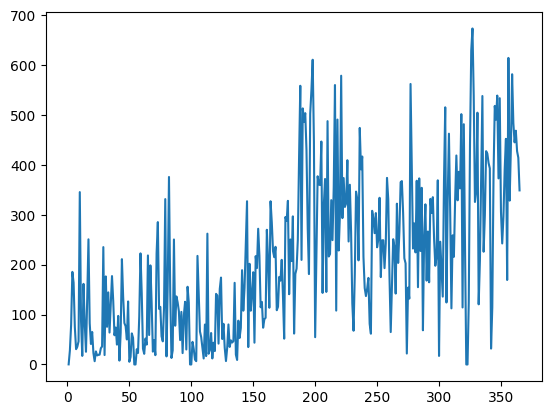

In [21]:
import json
import math
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re

"""
    UPCOMING PATCH
    -> get git integrated (MAX Priority)
    -> add ability to calculate top artists (High Priority)
    -> add UI for top x number of songs (Med Priority) 
    -> add UI for author based searches (Med Priorty)

"""

"""
    CURRENT PATCH:
      FIXED:
      -> matplotlib and numpy imports
      -> Fixed incorrect datascrape for all datapoints (lol)
      ADDED:
      -> Calculation of msPlayed and displayed multiple conversions
      -> Generation of dateList using <datetime>
      -> Line graph of msPlayed on per day
      CHANGED:
      -> Refactored
"""

with open("D:\Documents\my_spotify_data\MyData\StreamingHistoryAll.json", encoding='utf-8') as file:
    data = json.load(file)

endTimeList = []
artistNameList = []
trackNameList = []
msPlayedList = []
uniqueTrackNameList = []
listenCountList = []
songsListenedPerDayList = []
msPlayedPerDayList = []
#3000 endTime repeats

"""

MAIN!!!!!!

"""
def main():

    """BEGIN DATASCRAPE"""
    for endTime in data:
        endTimeList.append(endTime["endTime"])

    for artistName in data:
        artistNameList.append(artistName["artistName"])

    for song in data:
        trackNameList.append(song["trackName"])

    for msPlayed in data:
        msPlayedList.append(int(msPlayed["msPlayed"]))

    findUniqueTracks()
    generateDateList()
    songsListenedPerDay()
    msPlayedPerDay() 

    """END DATASCRAPE"""

    print("You have listened to " + str(len(trackNameList)) + " total songs!")
    print("You have listened to " + str(len(uniqueTrackNameList)) + " unique songs!")
    print("You average " + str(math.floor(len(trackNameList) / len(uniqueTrackNameList))) + " listens per each unique songs!")
    print("You have listened to " + str(CalculateMsPlayedTotal() / 1000) + " seconds of musical sounds and shit")
    print("You have listened to " + str(CalculateMsPlayedTotal() / 60000) + " minutes of musical sounds and shit")
    print("You have listened to " + str(CalculateMsPlayedTotal() / (60000 * 60)) + " hour of musical sounds and shit")
    print("You have listened to " + str(CalculateMsPlayedTotal() / (60000 * 60 * 24)) + " days of musical sounds and shit\n")

    print("Your balls are not implicit")
    
    listenCountOrdered()
    print()

    mostListensPerDay(10)
    print()
    mostMinPlayedPerDay(10)
    #for i in range(30):
    #    print(listenCountList[i])

    """PLOTTING"""
    minPlayedLineGraph()

#Unique Songs
def findUniqueTracks():   
    for song in trackNameList:
        if song not in uniqueTrackNameList:
            uniqueTrackNameList.append(song)

#Song listen count
def listenCount(songName):
    count = 0
    for song in trackNameList: 
        if song == songName:
            count += 1
    return count

#sorts song listen counts from highest to lowest
def listenCountOrdered():
    for song in uniqueTrackNameList:
        currentSongCount = listenCount(song)
        listenCountList.append([currentSongCount, song]) 
    listenCountList.sort(reverse=True)

#Calculates total msPlayed for past year
def CalculateMsPlayedTotal():
    msPlayedTotal = 0
    for msPlayed in msPlayedList:
        msPlayedTotal += msPlayed
    return msPlayedTotal


def generateDateList(): 
    global uniqueDateList
    temp = re.split(' |-', endTimeList[0])
    base = dt.datetime(int(temp[0]), int(temp[1]), int(temp[2]))
    uniqueDateList = [ dt.date.isoformat(base + dt.timedelta(days=x)).split(" ")[0] for x in range(365)] 
    
def songsListenedInDay(uDate):
    count = 0
    for date in endTimeList:
        if uDate in date:
            count += 1
    return count


def songsListenedPerDay():
    for uDate in uniqueDateList:
        songsListenedPerDayList.append([songsListenedInDay(uDate), uDate])
    songsListenedPerDayList.sort(reverse=True)
    

def mostListensPerDay(dataSize):
    index = 1
    for arr in songsListenedPerDayList:
        if index > dataSize:
            break
        print(str(index) + ". " + arr[1] + " - " + str(arr[0]) + " songs")
        index += 1


def msPlayedInDay(uDate):
    msPlayedTotal = 0
    for index in range(len(endTimeList)):
        if uDate in endTimeList[index]:
            msPlayedTotal += msPlayedList[index]
    return msPlayedTotal


def msPlayedPerDay():
    for uDate in uniqueDateList:
        msPlayedPerDayList.append([msPlayedInDay(uDate), uDate])
    

def mostMinPlayedPerDay(dataSize):
    index = 1
    msPlayedPerDayTemp = msPlayedPerDayList.copy()
    msPlayedPerDayTemp.sort(reverse=True)
    for arr in msPlayedPerDayTemp:
        if index > dataSize:
            break
        print(str(index) + ". " + arr[1] + " - " + str(round(arr[0] / 60000, 2)) + " minutes")
        index += 1


def minPlayedLineGraph():   
    temp = [x[0] / 60000 for x in msPlayedPerDayList]
    plt.plot([x for x in range (1,len(msPlayedPerDayList) + 1)], temp)
    plt.show()

if __name__ == "__main__":
    main()




